# Data Analyst vs. Data Scientist: Unveiling the Salary Divide in the World of Data

## Introduction

Understanding average salaries and differences between roles is crucial for making informed decisions aligning with personal aspirations and financial goals in a data-related career. (Kaur et.al, 2022). Here we delve into the realm of data careers to compare the average income of employees (USD) in two different data-related roles (“ Data Analyst” vs “Data Engineer”) within Canada and determine if there’s a significant difference between the two groups. This will provide valuable insights for those seeking to carve their path in the world of data.

We will focus on the specific ones listed below: 

`job_title` : The role worked during the year, focusing on “Data Analyst” and “ Data Science”.

`salary_in_usd`: The salary in USD which is the USD rate for the respective year. 

`employee_residence`: Employee's primary country of residence during the work year. We’ll focus on “ Canada”

For our location parameter, we have chosen the mean to help determine the central tendency of the two groups and identify roles with higher or lower average salaries. The scale parameter, standard deviation, measures income variability. Comparing the standard deviations of the two groups reveals salary variation within each role: a smaller deviation indicates more consistency, while a larger deviation indicates greater variability. 

Our project will measure the difference of means of the salaries of a data analyst and a data engineer. Let $s_1$ be the mean salary for a data analyst and $s_2$ be the mean salary for a data engineer. Now, we can declare our two hypotheses:

$H_0$: $s_1$ = $s_2$. There is no difference in the mean salaries between a data analyst and data engineer.

$H_1$: $s_1 \neq s_2$. There is a difference in the mean salaries between a data analyst and data engineer.

The hypothesis test in this context is to determine if there is a significant difference in the average salaries of data analysts and data scientists in Canada. We aim to assess whether any observed differences in the sample mean (average salaries) between the two groups are due to random chance or if they represent a real difference in the population means. 

## Preliminary Results

In [1]:
library(tidyverse)
library(cowplot)
library(digest)
library(gridExtra)
library(infer)
library(repr)
library(datateachr)

ERROR: Error in library(latex2exp): there is no package called ‘latex2exp’


In [2]:
# setting seed for entire project
set.seed = 4850

In [3]:
# read data file
data <- read_csv("data//ds_salaries.csv")

# clean up columns 
data <- data |>
    mutate(id = ...1) |>
    select(-...1, job_title) |>
    select(job_title, salary_in_usd) |>
    filter(!is.na(salary_in_usd), 
           # SHOULD WE KEEP CA?
           #employee_residence == "CA" &
           job_title == "Data Analyst" | job_title == "Data Scientist") |>
    mutate(job_title = as_factor(job_title)) 
    

head(data, 6)

New names:
• `` -> `...1`
Rows: 607 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): experience_level, employment_type, job_title, salary_currency, empl...
dbl (5): ...1, work_year, salary, salary_in_usd, remote_ratio

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


job_title,salary_in_usd
<fct>,<dbl>
Data Scientist,79833
Data Analyst,72000
Data Scientist,35735
Data Scientist,51321
Data Scientist,40481
Data Scientist,39916


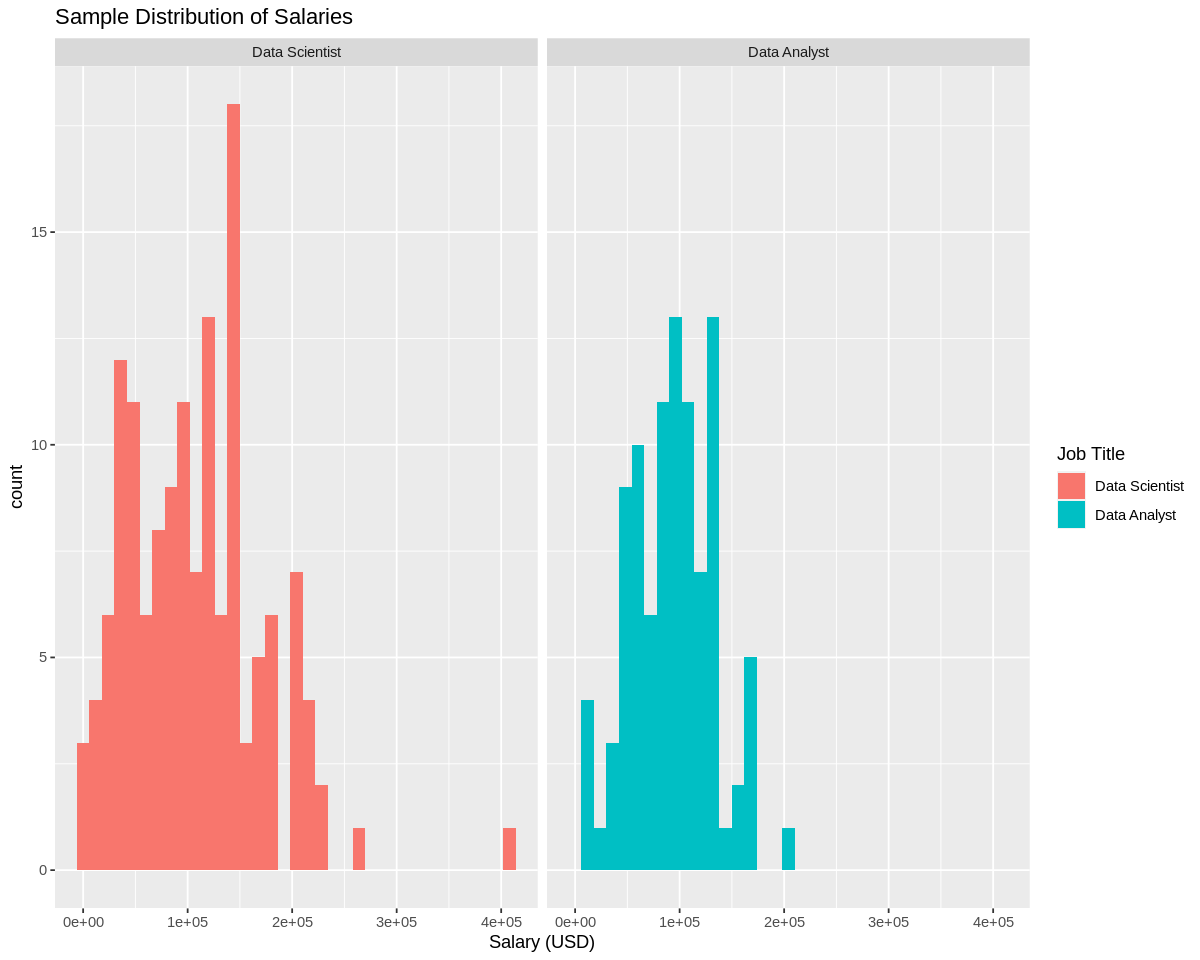

In [15]:
options(repr.plot.height = 8, repr.plot.width = 10)

# visualization of original data sample
sample_dist <- data |>
    ggplot(aes(x = salary_in_usd, fill = job_title)) +
    geom_histogram(binwidth = 12000) +
    facet_wrap(~ job_title) +
    ggtitle("Sample Distribution of Salaries") +
    xlab("Salary (USD)") +
    labs(fill = "Job Title")

sample_dist

In [5]:
# generate bootstrap samples and find difference in means

samp_dist <- data |>
  specify(formula = salary_in_usd ~ job_title) %>% 
  # hypothesize(null = "independence") %>% 
  generate(reps = 1000, type = "bootstrap") %>% 
  calculate(stat = "diff in means")

# the testing value

obs_test_data <- mean(samp_dist$stat)

obs_test_data

Warning message:
“The statistic is based on a difference or ratio; by default, for difference-based statistics, the explanatory variable is subtracted in the order "Data Scientist" - "Data Analyst", or divided in the order "Data Scientist" / "Data Analyst" for ratio-based statistics. To specify this order yourself, supply `order = c("Data Scientist", "Data Analyst")` to the calculate() function.”


[1] 15340.68

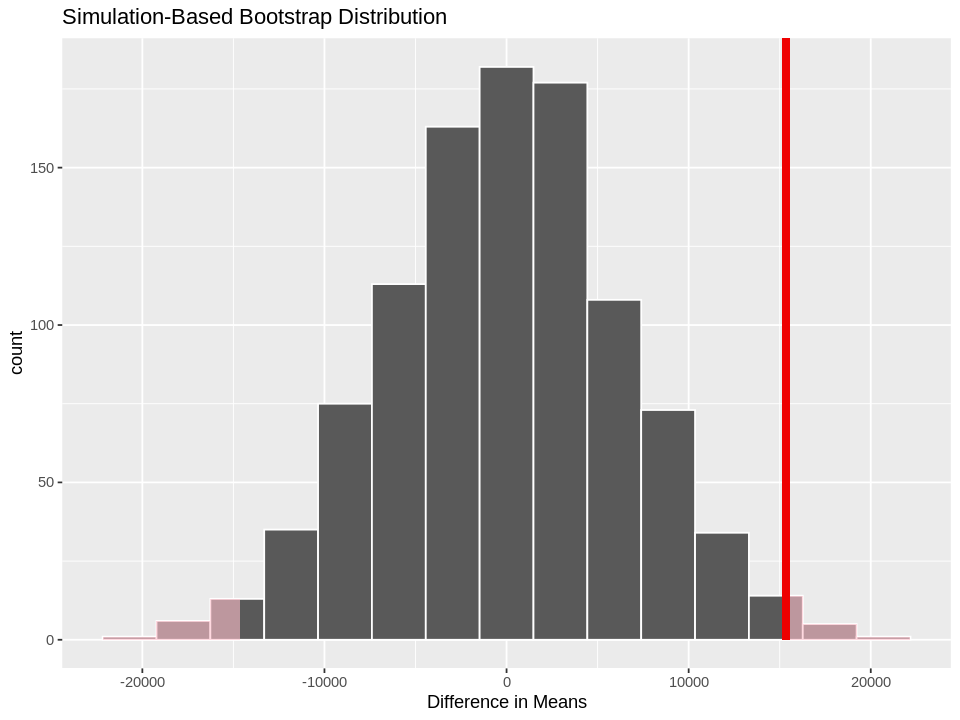

In [25]:
options(repr.plot.height = 6, repr.plot.width = 8)

# shift sample distribution to make it a null distribution
null_dist <- samp_dist |>
  mutate(stat = stat + (0 - obs_test_data))

# graph distribution alongisde test value and shading

visualize(null_dist) +
    shade_p_value(obs_test_data, direction = 'two-sided') +
    labs(x = "Difference in Means")

In [7]:
null_dist |> get_p_value(obs_test_data, direction = 'two-sided')

p_value
<dbl>
0.022


## References

T. Z. Quan and M. Raheem, "Salary Prediction in Data Science Field Using Specialized Skills and Job Benefits–A Literature", Journal of Applied Technology and Innovation, vol. 6, no. 3, pp. 70-74, 2022, ISSN 2600-7304.

A. Kaur, D. Verma and N. Kaur, "Utilizing Quantitative Data Science Salary Analysis to Predict Job Salaries," 2022 2nd International Conference on Innovative Sustainable Computational Technologies (CISCT), Dehradun, India, 2022, pp. 1-4, doi: 10.1109/CISCT55310.2022.10046491.